In [1]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from xgboost import XGBClassifier
import math
from sklearn import metrics

# read in all our data
df=pd.read_csv("idm read.csv")

Matplotlib is building the font cache; this may take a moment.


In [3]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [4]:
df.shape

(70692, 22)

In [262]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [263]:
df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

AttributeError: 'DataFrame' object has no attribute 'types'

In [264]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [265]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [266]:
df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [6]:
missing_values_count = df.isnull().sum()
missing_values_count

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
# separating numerical and catagorical varibale.
num_var=df.columns[df.dtypes !='object']
cat_var=df.columns[df.dtypes == 'object']
print(num_var)
print(cat_var)

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
Index([], dtype='object')


In [269]:
#Converting datatypes to integer.
df['Diabetes_binary'] = df['Diabetes_binary'].astype('int')
df['HighBP'] = df['HighBP'].astype('int')
df['HighChol'] = df['HighChol'].astype('int')
df['CholCheck'] = df['CholCheck'].astype('int')
df['BMI'] = df['BMI'].astype('int')
df['Smoker'] = df['Smoker'].astype('int')
df['Stroke'] = df['Stroke'].astype('int')
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].astype('int')
df['PhysActivity'] = df['PhysActivity'].astype('int')
df['Fruits'] = df['Fruits'].astype('int')
df['Veggies'] = df['Veggies'].astype('int')

df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].astype('int')
df['AnyHealthcare'] = df['AnyHealthcare'].astype('int')
df['NoDocbcCost'] = df['NoDocbcCost'].astype('int')
df['GenHlth'] = df['GenHlth'].astype('int')
df['MentHlth'] = df['MentHlth'].astype('int')
df['PhysHlth'] = df['PhysHlth'].astype('int')
df['DiffWalk'] = df['DiffWalk'].astype('int')
df['Sex'] = df['Sex'].astype('int')
df['Age'] = df['Age'].astype('int')
df['Education'] = df['Education'].astype('int')
df['Income'] = df['Income'].astype('int')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       70692 non-null  int32
 1   HighBP                70692 non-null  int32
 2   HighChol              70692 non-null  int32
 3   CholCheck             70692 non-null  int32
 4   BMI                   70692 non-null  int32
 5   Smoker                70692 non-null  int32
 6   Stroke                70692 non-null  int32
 7   HeartDiseaseorAttack  70692 non-null  int32
 8   PhysActivity          70692 non-null  int32
 9   Fruits                70692 non-null  int32
 10  Veggies               70692 non-null  int32
 11  HvyAlcoholConsump     70692 non-null  int32
 12  AnyHealthcare         70692 non-null  int32
 13  NoDocbcCost           70692 non-null  int32
 14  GenHlth               70692 non-null  int32
 15  MentHlth              70692 non-null  int32
 16  Phys

In [271]:
# splitting the data into test and training data
X = df.drop('Diabetes_binary', axis = 1)
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [272]:
X_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
15796,0,0,1,25,0,0,0,1,1,1,...,1,0,1,0,0,0,1,10,5,7
11358,0,0,0,28,0,0,0,1,1,1,...,1,0,2,0,0,0,1,10,6,8
25283,0,0,1,34,1,0,0,1,1,1,...,1,0,2,14,0,0,0,6,5,7
542,0,1,1,25,0,0,0,1,0,1,...,1,0,3,0,0,0,0,11,4,3
25622,0,0,1,22,1,0,0,1,1,1,...,1,0,1,0,0,0,0,10,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,0,0,1,27,1,0,0,1,1,1,...,1,0,2,0,0,0,0,5,6,8
45891,1,1,1,33,0,0,0,1,0,1,...,1,0,4,2,0,0,1,5,6,7
42613,0,1,1,37,0,0,0,1,1,0,...,1,0,4,0,8,0,0,11,2,2
43567,1,1,1,23,0,0,0,0,1,0,...,1,0,3,0,0,0,0,12,6,6


In [273]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(49484, 21)
(49484,)
(21208, 21)
(21208,)


In [274]:
# Using RandomForest Model
rf = RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1)
%time rf.fit(X_train, y_train)
rf.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 7.99 s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


0.7393436439079593

In [275]:
#Using GradientBoosting Model
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=270, random_state=250)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

In [276]:
gb.score(X_test, y_test)

0.7555167861184459

In [277]:
#Naive BAse
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [278]:
test_pred = classifier.predict(X_test)

In [279]:
from sklearn import metrics
from sklearn.metrics import classification_report
print('The accuracy of Naive Bayes is: ', metrics.accuracy_score(test_pred, y_test))
print(classification_report(test_pred,y_test))

The accuracy of Naive Bayes is:  0.7236420218785364
              precision    recall  f1-score   support

           0       0.73      0.72      0.72     10648
           1       0.72      0.73      0.72     10560

    accuracy                           0.72     21208
   macro avg       0.72      0.72      0.72     21208
weighted avg       0.72      0.72      0.72     21208



In [280]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = "gini", random_state = 250,max_depth=50, min_samples_leaf=120)
DTC.fit(X_train, y_train)
dt_pred = DTC.predict(X_test)

In [281]:
metrics.accuracy_score(dt_pred, y_test)

0.7410411165597888

In [282]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression 
logReg = LogisticRegression(random_state = 0,max_iter = 500)
logReg.fit(X_train, y_train)
l_pred = logReg.predict(X_test)

In [283]:
metrics.accuracy_score(l_pred, y_test)

0.7491512636740852

In [284]:
# DATA VISUALIZATION

Balanced data set has eqully split diabetes samples.


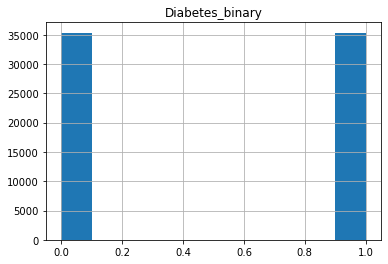

In [285]:
# balanced data set
df.hist('Diabetes_binary')
print("Balanced data set has eqully split diabetes samples.")

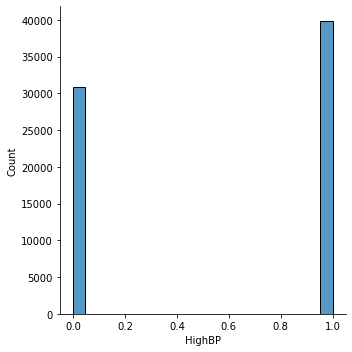

In [286]:
sns.displot(df.HighBP,kde=False)

<AxesSubplot:>

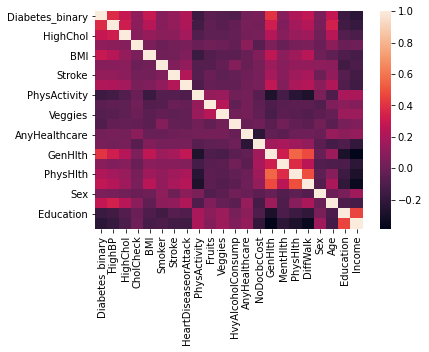

In [287]:
sns.heatmap(df.corr())

In [288]:
import matplotlib.pyplot as plt
g=sns.FacetGrid(df, row='sex', col='Age', size= 2.8, aspect=1.4)
g.map(plt.hist, 'Diabetes_binary', alpha=.5, bins=10)
g.add_legend

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyError: 'sex'

In [289]:
y_pred = rf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


[[7315 3166]
 [2362 8365]]


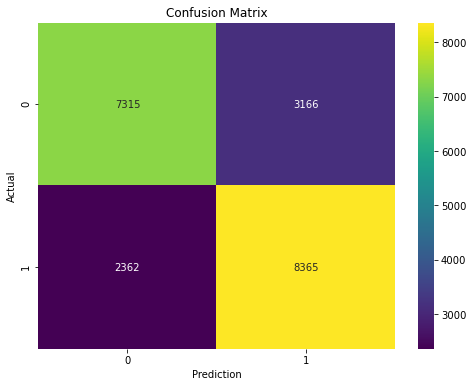

In [290]:
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'viridis')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [291]:
feature = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)

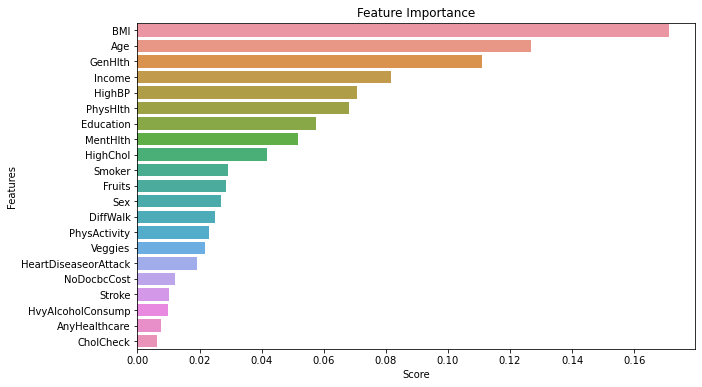

In [292]:
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


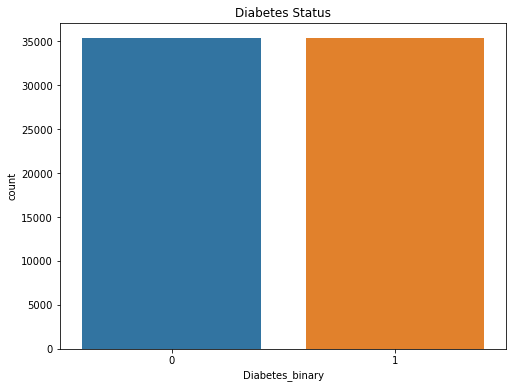

In [293]:
plt.figure(figsize = (8,6))
sns.countplot(df['Diabetes_binary'])
plt.title("Diabetes Status")
plt.show()

In [294]:
diabetes_bp = df.groupby(['Diabetes_binary', 'HighBP']).size().reset_index(name = 'Count')
print(diabetes_bp)

   Diabetes_binary  HighBP  Count
0                0       0  22118
1                0       1  13228
2                1       0   8742
3                1       1  26604


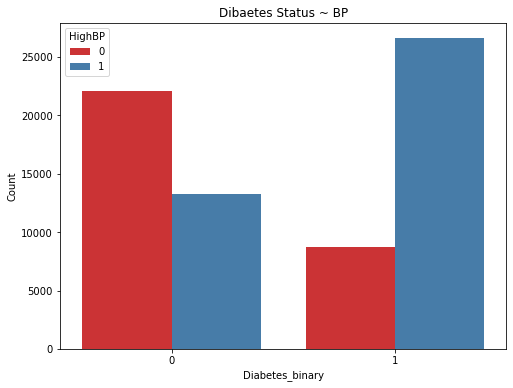

In [295]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'HighBP', data = diabetes_bp, palette = 'Set1')
plt.title("Dibaetes Status ~ BP")
plt.show()

In [296]:
diabetes_chol = df.groupby(['Diabetes_binary', 'HighChol']).size().reset_index(name = 'Count')
print(diabetes_chol)

   Diabetes_binary  HighChol  Count
0                0         0  21869
1                0         1  13477
2                1         0  11660
3                1         1  23686


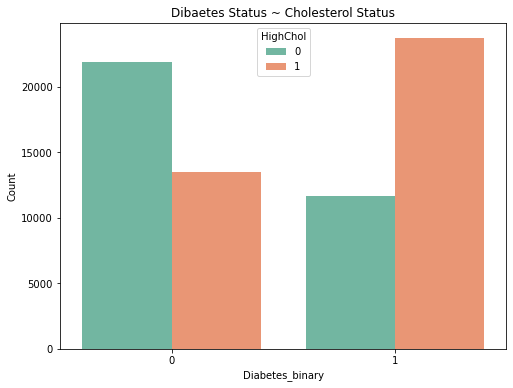

In [297]:
#visualize diabetes status ~ cholesterol status
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'HighChol', data = diabetes_chol, palette = 'Set2')
plt.title("Dibaetes Status ~ Cholesterol Status")
plt.show()

In [298]:
#group diabetes status & cholesterol check
diabetes_check = df.groupby(['Diabetes_binary', 'CholCheck']).size().reset_index(name = 'Count')
print(diabetes_check)

   Diabetes_binary  CholCheck  Count
0                0          0   1508
1                0          1  33838
2                1          0    241
3                1          1  35105


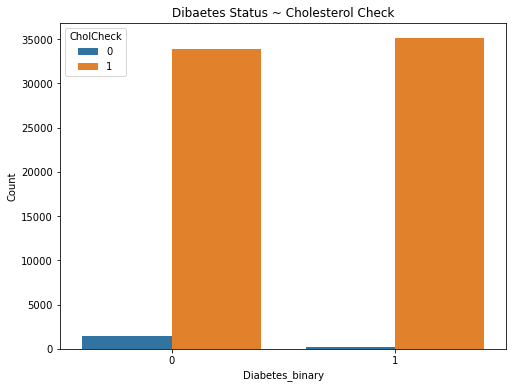

In [299]:
#visualize diabetes status ~ cholesterol check 
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'CholCheck', data = diabetes_check)
plt.title("Dibaetes Status ~ Cholesterol Check")
plt.show()

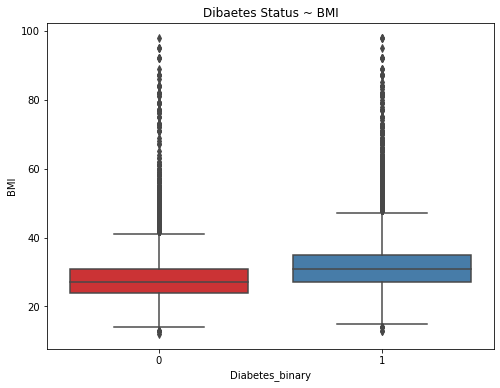

In [300]:
#visualize diabetes status ~ BMI
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Diabetes_binary', y = 'BMI', palette = 'Set1')
plt.title("Dibaetes Status ~ BMI")
plt.show()

In [301]:
#group diabetes status & smoker status
diabetes_smoker = df.groupby(['Diabetes_binary', 'Smoker']).size().reset_index(name = 'Count')
print(diabetes_smoker)

   Diabetes_binary  Smoker  Count
0                0       0  20065
1                0       1  15281
2                1       0  17029
3                1       1  18317


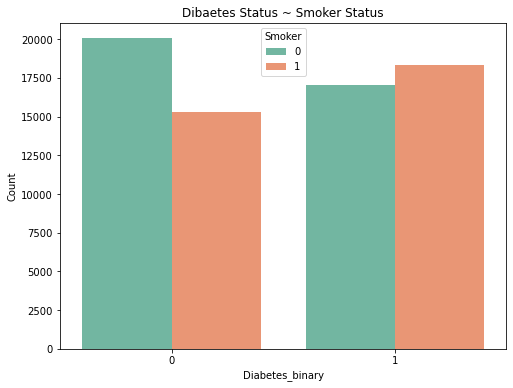

In [302]:
#visualize diabetes status ~ smoker status 
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'Smoker', data = diabetes_smoker, palette = 'Set2')
plt.title("Dibaetes Status ~ Smoker Status")
plt.show()


In [303]:
#group diabetes status & stroke status
diabetes_stroke = df.groupby(['Diabetes_binary', 'Stroke']).size().reset_index(name = 'Count')
print(diabetes_stroke)

   Diabetes_binary  Stroke  Count
0                0       0  34219
1                0       1   1127
2                1       0  32078
3                1       1   3268


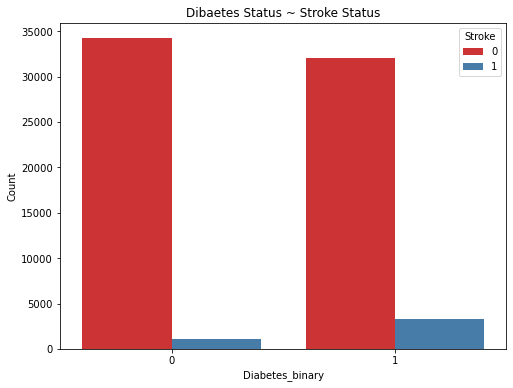

In [304]:
#visualize diabetes status ~ stroke status 
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'Stroke', data = diabetes_stroke, palette = 'Set1')
plt.title("Dibaetes Status ~ Stroke Status")
plt.show()


In [305]:
#group diabetes status & heart diseaseor attack
diabetes_heart = df.groupby(['Diabetes_binary', 'HeartDiseaseorAttack']).size().reset_index(name = 'Count')
print(diabetes_heart)

   Diabetes_binary  HeartDiseaseorAttack  Count
0                0                     0  32775
1                0                     1   2571
2                1                     0  27468
3                1                     1   7878


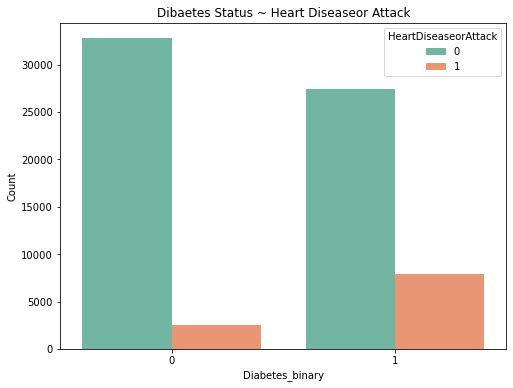

In [306]:
#visualize diabetes status ~ heart diseaseor attack
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'HeartDiseaseorAttack', data = diabetes_heart, palette = 'Set2')
plt.title("Dibaetes Status ~ Heart Diseaseor Attack")
plt.show()



In [307]:
#group diabetes status & physical activity
diabetes_physical = df.groupby(['Diabetes_binary', 'PhysActivity']).size().reset_index(name = 'Count')
print(diabetes_physical)


   Diabetes_binary  PhysActivity  Count
0                0             0   7934
1                0             1  27412
2                1             0  13059
3                1             1  22287


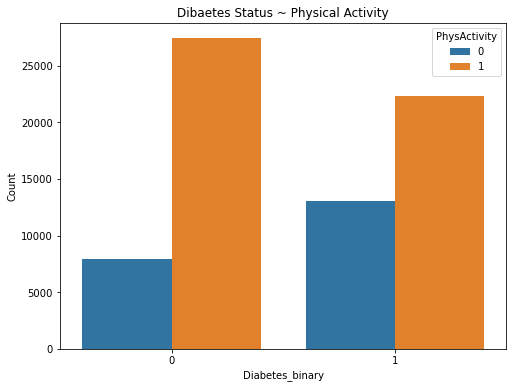

In [308]:
#visualize diabetes status ~ physical activity
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'PhysActivity', data = diabetes_physical)
plt.title("Dibaetes Status ~ Physical Activity")
plt.show()

In [309]:
#group diabetes status & fruits
diabetes_fruit = df.groupby(['Diabetes_binary', 'Fruits']).size().reset_index(name = 'Count')
print(diabetes_fruit)

   Diabetes_binary  Fruits  Count
0                0       0  12790
1                0       1  22556
2                1       0  14653
3                1       1  20693


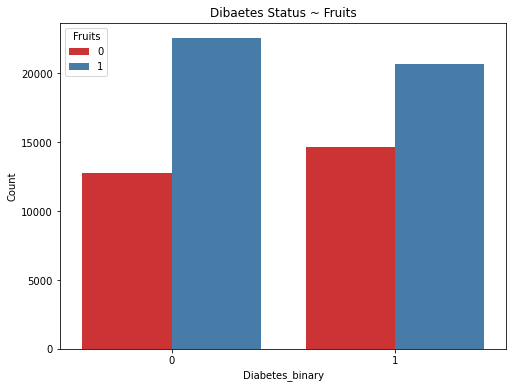

In [310]:
#visualize diabetes status ~ fruits
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'Fruits', data = diabetes_fruit, palette = 'Set1')
plt.title("Dibaetes Status ~ Fruits")
plt.show()



In [311]:
#group diabetes status & veggies
diabetes_veggies = df.groupby(['Diabetes_binary', 'Veggies']).size().reset_index(name = 'Count')
print(diabetes_veggies)

   Diabetes_binary  Veggies  Count
0                0        0   6322
1                0        1  29024
2                1        0   8610
3                1        1  26736


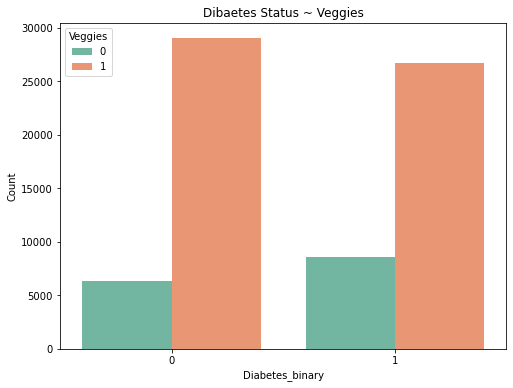

In [312]:
#visualize diabetes status ~ veggies
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'Veggies', data = diabetes_veggies, palette = 'Set2')
plt.title("Dibaetes Status ~ Veggies")
plt.show()

In [313]:
#group diabetes status & HvyAlcoholConsump
diabetes_alcohol = df.groupby(['Diabetes_binary', 'HvyAlcoholConsump']).size().reset_index(name = 'Count')
print(diabetes_alcohol)

   Diabetes_binary  HvyAlcoholConsump  Count
0                0                  0  33158
1                0                  1   2188
2                1                  0  34514
3                1                  1    832


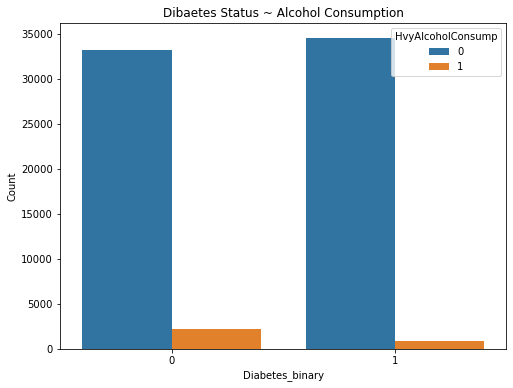

In [314]:
#visualize diabetes status ~ HvyAlcoholConsump
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'HvyAlcoholConsump', data = diabetes_alcohol)
plt.title("Dibaetes Status ~ Alcohol Consumption")
plt.show()

In [315]:
#group diabetes status & AnyHealthcare
diabetes_healthcare = df.groupby(['Diabetes_binary', 'AnyHealthcare']).size().reset_index(name = 'Count')
print(diabetes_healthcare)

   Diabetes_binary  AnyHealthcare  Count
0                0              0   1762
1                0              1  33584
2                1              0   1422
3                1              1  33924


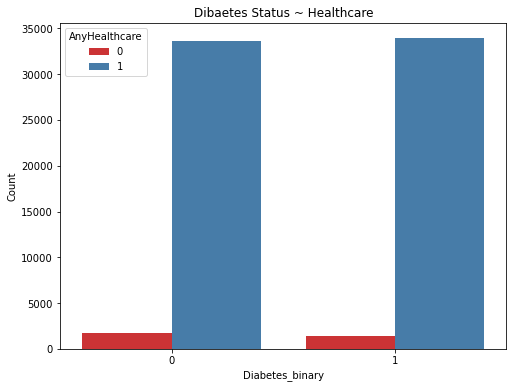

In [316]:
#visualize diabetes status ~ AnyHealthcare
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'AnyHealthcare', data = diabetes_healthcare, palette = 'Set1')
plt.title("Dibaetes Status ~ Healthcare")
plt.show()

In [317]:
#group diabetes status & doctor cost
diabetes_NoDocbcCost = df.groupby(['Diabetes_binary', 'NoDocbcCost']).size().reset_index(name = 'Count')
print(diabetes_NoDocbcCost)

   Diabetes_binary  NoDocbcCost  Count
0                0            0  32449
1                0            1   2897
2                1            0  31604
3                1            1   3742


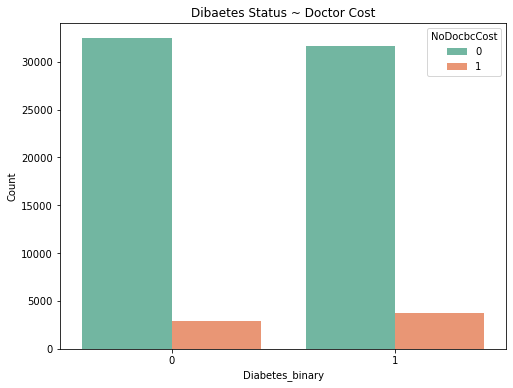

In [318]:
#visualize diabetes status ~ doctor cost
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'NoDocbcCost', data = diabetes_NoDocbcCost, palette = 'Set2')
plt.title("Dibaetes Status ~ Doctor Cost")
plt.show()

In [319]:
#group diabetes status & general health
diabetes_general = df.groupby(['Diabetes_binary', 'GenHlth']).size().reset_index(name = 'Count')
print(diabetes_general)

   Diabetes_binary  GenHlth  Count
0                0        1   7142
1                0        2  13491
2                0        3   9970
3                0        4   3513
4                0        5   1230
5                1        1   1140
6                1        2   6381
7                1        3  13457
8                1        4   9790
9                1        5   4578


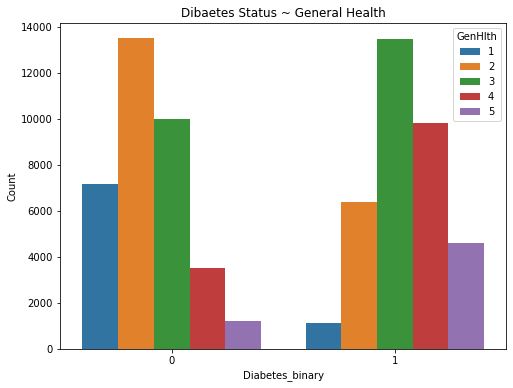

In [320]:
#visualize diabetes status ~ general health
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'GenHlth', data = diabetes_general)
plt.title("Dibaetes Status ~ General Health")
plt.show()

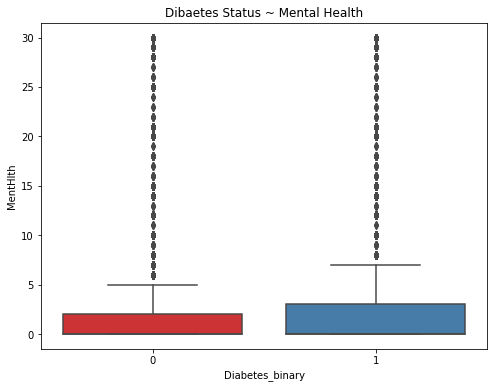

In [321]:
#visualize diabetes status ~ mental health
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Diabetes_binary', y = 'MentHlth', palette = 'Set1')
plt.title("Dibaetes Status ~ Mental Health")
plt.show()

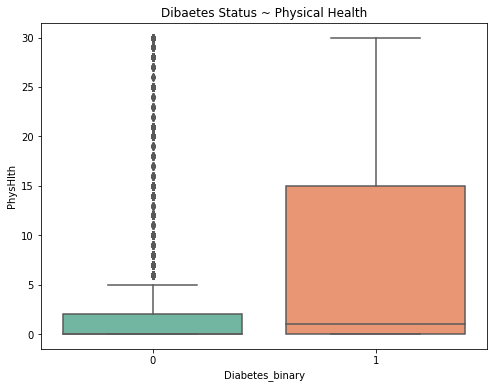

In [322]:
#visualize diabetes status ~ physical health
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Diabetes_binary', y = 'PhysHlth', palette = 'Set2')
plt.title("Dibaetes Status ~ Physical Health")
plt.show()

In [323]:
#group diabetes status & difficulty walking
diabetes_walk = df.groupby(['Diabetes_binary', 'DiffWalk']).size().reset_index(name = 'Count')
print(diabetes_walk)

   Diabetes_binary  DiffWalk  Count
0                0         0  30601
1                0         1   4745
2                1         0  22225
3                1         1  13121


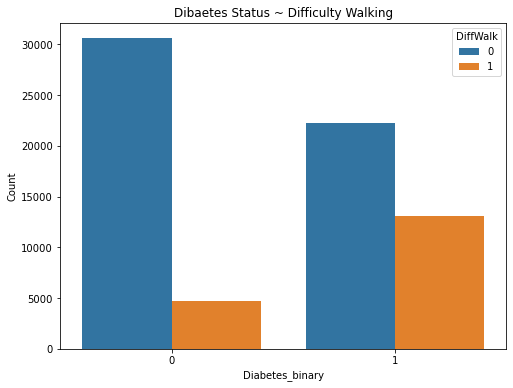

In [324]:
#visualize diabetes status ~ difficulty walking
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'DiffWalk', data = diabetes_walk)
plt.title("Dibaetes Status ~ Difficulty Walking")
plt.show()


In [325]:
#group diabetes status & gender
diabetes_sex = df.groupby(['Diabetes_binary', 'Sex']).size().reset_index(name = 'Count')
print(diabetes_sex)

   Diabetes_binary  Sex  Count
0                0    0  19975
1                0    1  15371
2                1    0  18411
3                1    1  16935


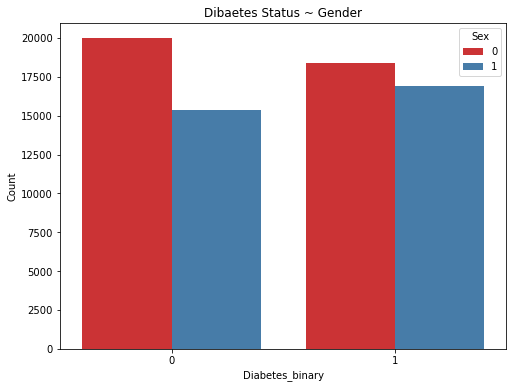

In [326]:
#visualize diabetes status ~ gender
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'Sex', data = diabetes_sex, palette = 'Set1')
plt.title("Dibaetes Status ~ Gender")
plt.show()


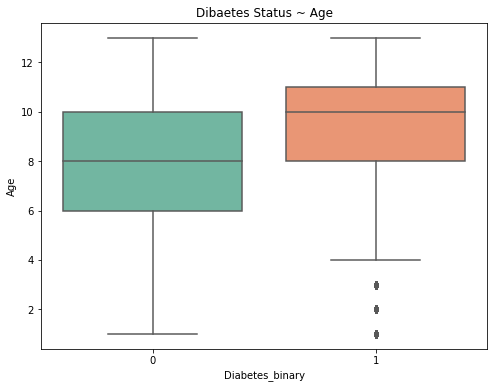

In [327]:
#visualize diabetes status ~ age
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Diabetes_binary', y = 'Age', palette = 'Set2')
plt.title("Dibaetes Status ~ Age")
plt.show()

In [328]:
#group diabetes status & education
diabetes_education = df.groupby(['Diabetes_binary', 'Education']).size().reset_index(name = 'Count')
print(diabetes_education)

    Diabetes_binary  Education  Count
0                 0          1     28
1                 0          2    464
2                 0          3   1151
3                 0          4   8407
4                 0          5   9676
5                 0          6  15620
6                 1          1     47
7                 1          2   1183
8                 1          3   2296
9                 1          4  11066
10                1          5  10354
11                1          6  10400


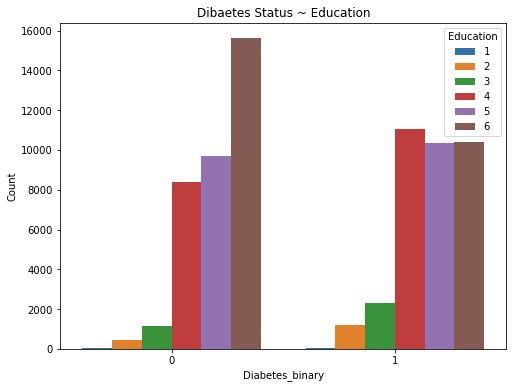

In [329]:
#visualize diabetes status ~ education
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'Education', data = diabetes_education)
plt.title("Dibaetes Status ~ Education")
plt.show()

In [330]:
#group diabetes status & income
diabetes_income = df.groupby(['Diabetes_binary', 'Income']).size().reset_index(name = 'Count')
print(diabetes_income)

    Diabetes_binary  Income  Count
0                 0       1   1228
1                 0       2   1412
2                 0       3   1989
3                 0       4   2604
4                 0       5   3506
5                 0       6   4996
6                 0       7   6160
7                 0       8  13451
8                 1       1   2383
9                 1       2   3086
10                1       3   3568
11                1       4   4054
12                1       5   4504
13                1       6   5291
14                1       7   5265
15                1       8   7195


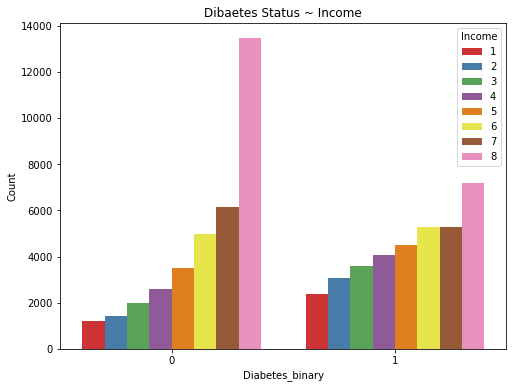

In [331]:
#visualize diabetes status ~ income
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'Income', data = diabetes_income, palette = 'Set1')
plt.title("Dibaetes Status ~ Income")
plt.show()